# 🫀 Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes. 

We are going to follow the following workflow:
1) Problem definition
2) Data
3) Evaluation
4) Features
5) Modeling 
6) Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heat disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning repository. There is also a version available on Kaggle.
- UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/heart+disease
- Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether a patient have heart disease during the proof of concept, we will pursue the project.

## 4. Features

**Data Dictionary:**
1. *age*: age in years
2. *sex*: sex (1 = male; 0 = female)
3. *cp*: chest pain type
   * Value 0: typical angina
   * Value 1: atypical angina
   * Value 2: non-anginal pain
   * Value 3: asymptomatic
4. *trestbps*: resting blood pressure (in mm Hg on admission to the hospital)
5. *chol*: serum cholestoral in mg/dl
6. *fbs*: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. *restecg*: resting electrocardiographic results
   * Value 0: normal
   * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. *thalach*: maximum heart rate achieved
9. *exang*: exercise induced angina (1 = yes; 0 = no)
10. *oldpeak* = ST depression induced by exercise relative to rest
11. *slope*: the slope of the peak exercise ST segment
   * Value 0: upsloping
   * Value 1: flat
   * Value 2: downsloping
12. *ca*: number of major vessels (0-3) colored by flourosopy
13. *thal*: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
14. *condition*: 0 = no disease, 1 = disease

## Preparing tools

In [59]:
# Imports

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## EDA


In [2]:
df = pd.read_csv("heart-disease-data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: target, dtype: int64


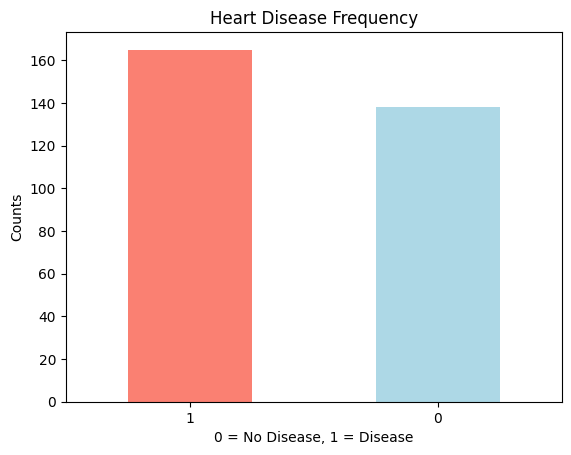

In [5]:
# Class value counts
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Counts")
plt.xticks(rotation=0);

In [6]:
# Missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Basic stats about data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Patterns in Data

### Heart disease frequency according to sex

In [8]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Cross tab
# 0 = Female, 1 = Male
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


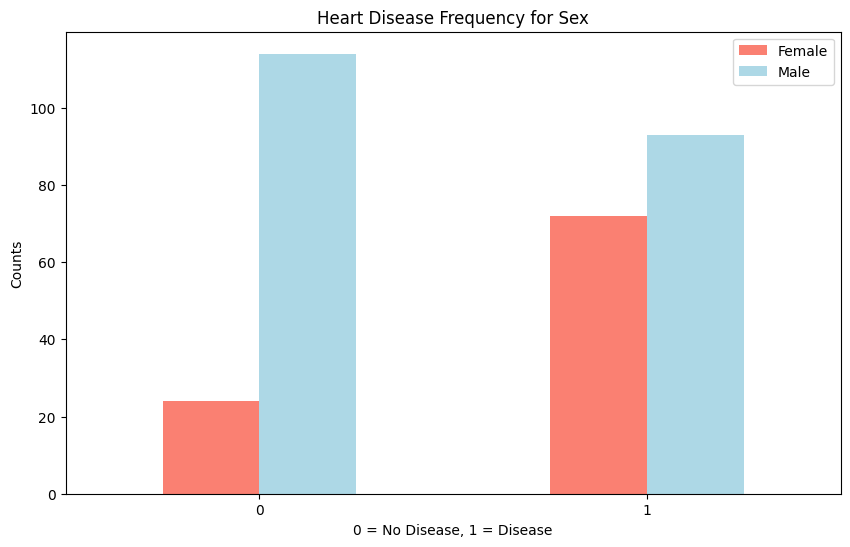

In [10]:
# Visualize cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Counts")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [11]:
 df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Age vs. Maximum heart rate achieved

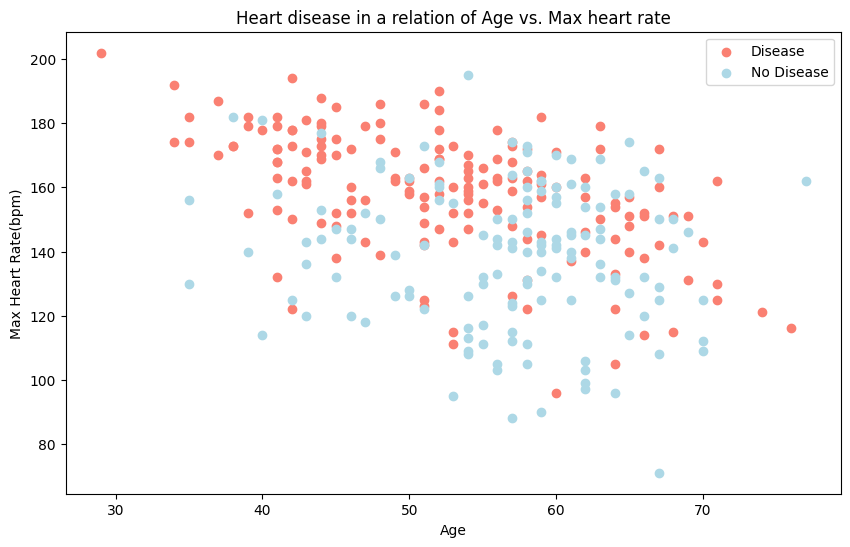

In [12]:
plt.figure(figsize=(10, 6))

# Scatter plot with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter plot with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Description
plt.title("Heart disease in a relation of Age vs. Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate(bpm)")
plt.legend(["Disease", "No Disease"]);

In [13]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


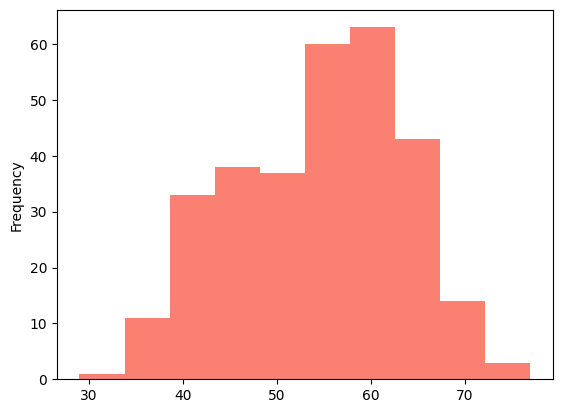

In [14]:
# Age distribution
df.age.plot.hist(color="salmon");

### Heart disease frequency per chest pain type

*cp*: chest pain type
   * Value 0: typical angina
   * Value 1: atypical angina
   * Value 2: non-anginal pain
   * Value 3: asymptomatic

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


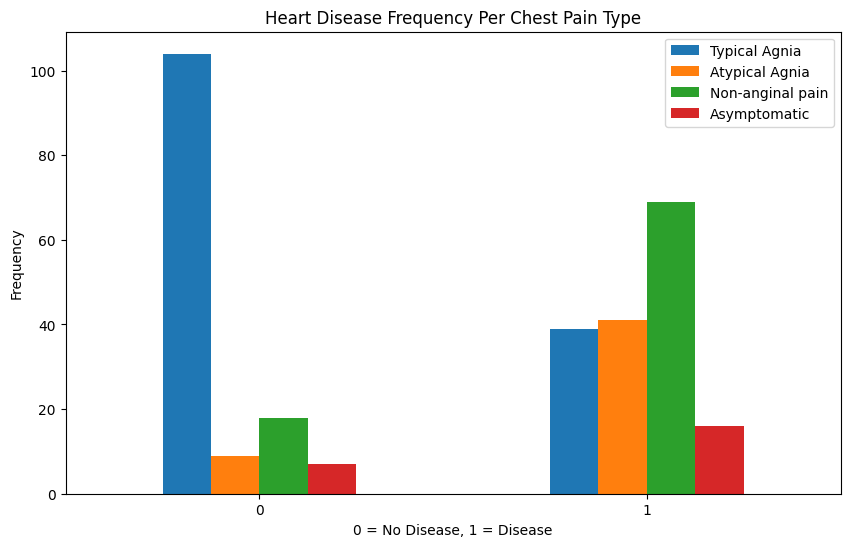

In [16]:
pd.crosstab(df.target, df.cp).plot(kind="bar",
                                   figsize=(10, 6))

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Typical Agnia", "Atypical Agnia", "Non-anginal pain", "Asymptomatic"])
plt.xticks(rotation=0);

### Corrolation Matrix

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


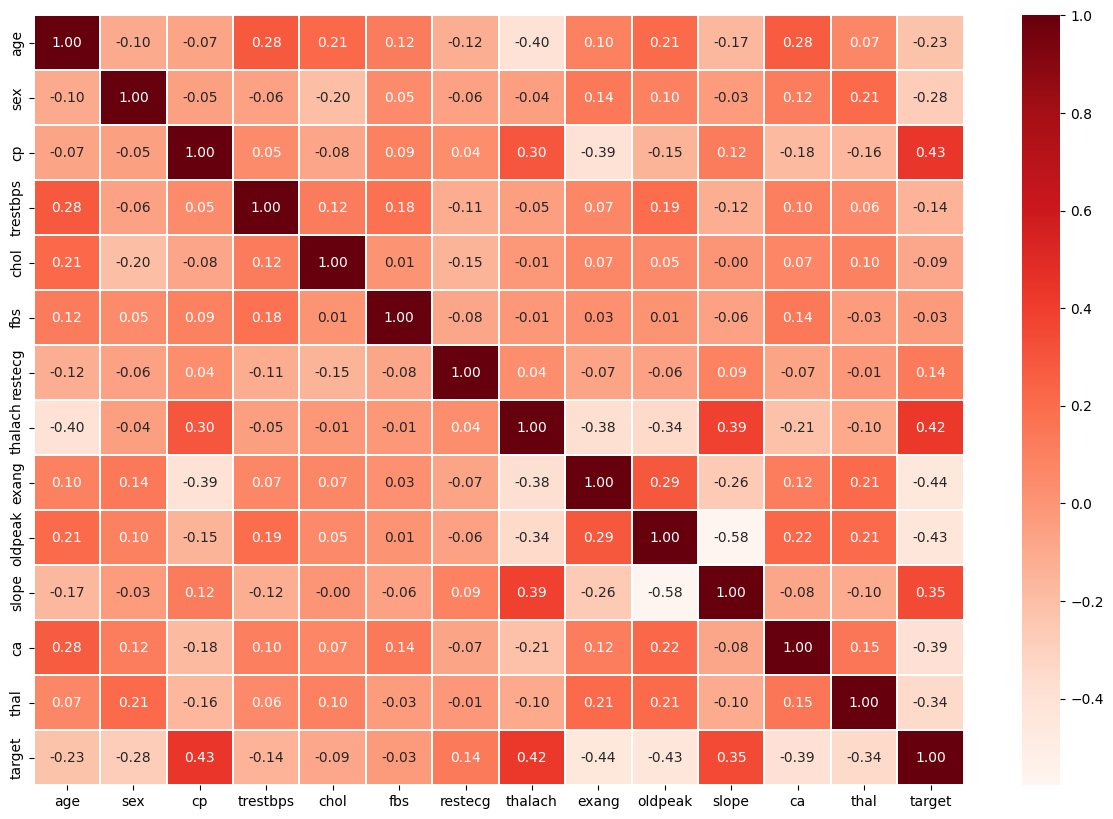

In [18]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.2,
                 fmt=".2f",
                 cmap="Reds");

## Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
np.random.seed(42)

# Features and Label
X = df.drop("target", axis=1)
y = df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(303, 13) (303,)
(242, 13) (242,) (61, 13) (242,)


### Comparing models

We will try following models for our binary classification:
* `LogisticRegressor`
* `KNeighborsClassifier`
* `RandomForestClassifier`
* `GaussianNB`

In [21]:
# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    
    models: dict of different models
    X_train: training features, 
    X_test: testing features, 
    y_train: training labels, 
    y_test: testing labels
    """
    np.random.seed(42)
    
    # model scores dict
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Naive Bayes': 0.8688524590163934}

In [23]:
# Model comparison
model_compare = pd.DataFrame(model_scores, 
                             index=["accuracy"])

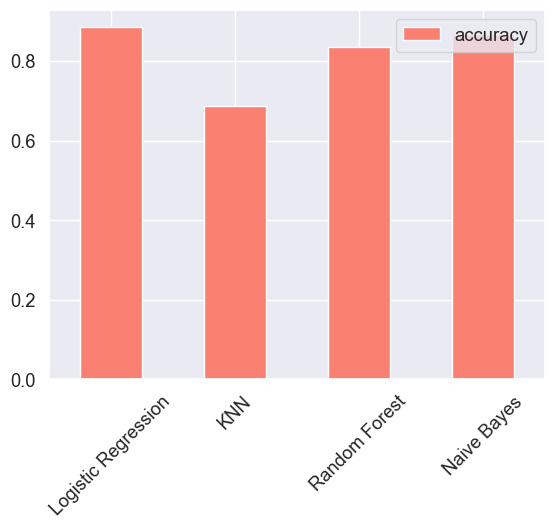

In [113]:
model_compare.T.plot(kind="bar",
                     color="salmon")

plt.xticks(rotation=45);

## Hyperparameter Tuning

In [25]:
# Tune KNN to see if it improves
train_scores = []
test_scores = []

# Neighbors
k = range(1, 21, 1)

# KNN instance
knn = KNeighborsClassifier()

for i in k:
    knn.set_params(n_neighbors=i)
    
    # fit model
    knn.fit(X_train, y_train)
    
    # append scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data: 75.41%


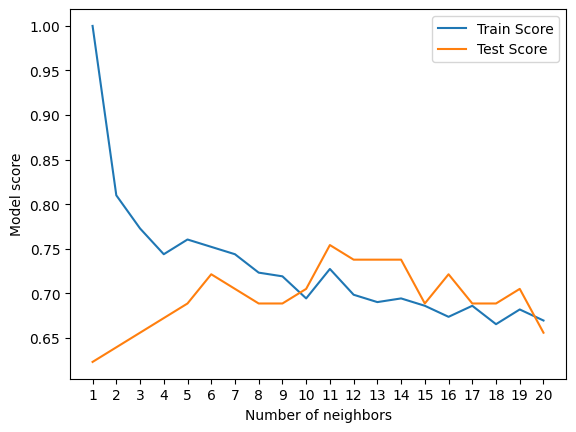

In [27]:
# Plot scores
plt.plot(k, train_scores, label="Train Score")
plt.plot(k, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1, 21, 1))
plt.legend();

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

### Tuning Hyperparameters with RandomizedSearchCV
- We will attempt to tune the following with `RandomizedSearchCV`:
> `LogisticRegression()`
>
> `RandomForestClassifier()`
>
> `GuassianNB()`

In [28]:
# Base model scores
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Naive Bayes': 0.8688524590163934}

In [29]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Hyperparameter grid for RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Hyperparameter grid for GuassianNB()
nb_grid = {
    "var_smoothing": np.logspace(0, -9, num=100)
}

**Hyperparameter random search for LogisticRegression( )**

In [30]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
print(f"Base model score:\t{model_scores['Logistic Regression']}")
print(f"Tuned model score:\t{rs_log_reg.score(X_test, y_test)}")

Base model score:	0.8852459016393442
Tuned model score:	0.8852459016393442


**Hyperparameter random search for RandomForestClassifier()**

In [33]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [35]:
print(f"Base model score:\t{model_scores['Random Forest']}")
print(f"Tuned model score:\t{rs_rf.score(X_test, y_test)}")

Base model score:	0.8360655737704918
Tuned model score:	0.8688524590163934


**Hyperparameter random search for GaussianNB( )**

In [36]:
np.random.seed(42)

rs_nb = RandomizedSearchCV(estimator=GaussianNB(),
                           param_distributions=nb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_nb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [37]:
rs_nb.best_params_

{'var_smoothing': 1.5199110829529332e-05}

In [38]:
print(f"Base model score:\t{model_scores['Naive Bayes']}")
print(f"Tuned model score:\t{rs_nb.score(X_test, y_test)}")

Base model score:	0.8688524590163934
Tuned model score:	0.8688524590163934


In [40]:
#### Best model and score so far after randomized search 
rs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating tuned model

In [47]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

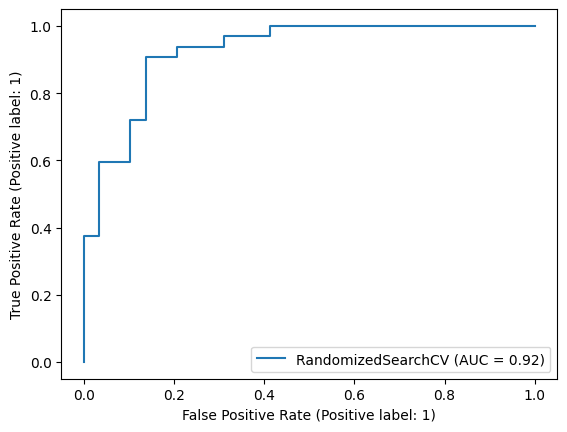

In [61]:
# ROC curve
RocCurveDisplay.from_estimator(rs_log_reg, 
                               X_test, 
                               y_test);

In [133]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    
    # Description
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

In [136]:
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_preds)
conf_mat

array([[25,  4],
       [ 3, 29]])

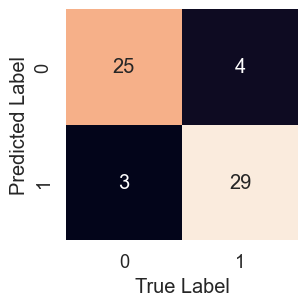

In [137]:
plot_confusion_matrix(y_test, y_preds)

In [138]:
# Classification report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### New classifier with best hyperparameters

In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [78]:
# New classifier with best hyperparameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

In [93]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)

# Cross validated precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_pre = np.mean(cv_pre)

# Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)

# Cross validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)


print(f"Accuracy:\t{cv_acc}")
print(f"Precision:\t{cv_pre}")
print(f"Recall:\t\t{cv_recall}")
print(f"F1-score:\t{cv_f1}")

Accuracy:	0.8479781420765027
Precision:	0.8215873015873015
Recall:		0.9272727272727274
F1-score:	0.8705403543192143


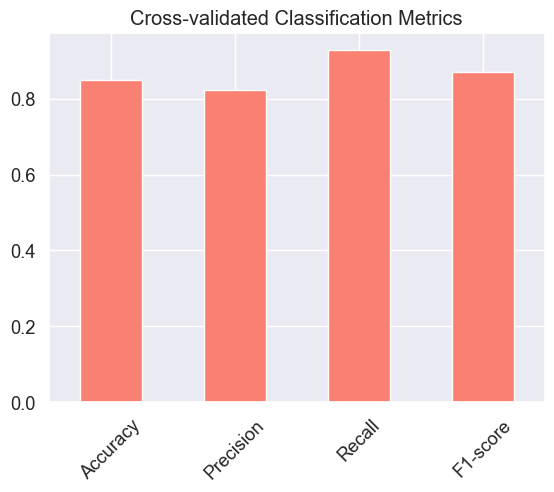

In [139]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_recall,
                           "F1-score": cv_f1}, 
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False,
                      color ='salmon')

plt.xticks(rotation=45);

## Feature Importance

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [119]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [120]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490209,  0.02472938, -0.63120414, -0.57590999,
         0.47095168, -0.65165343, -0.69984218]])

In [122]:
# Coef's features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036992236053252437,
 'sex': -0.9042409838610448,
 'cp': 0.6747282334918359,
 'trestbps': -0.011613397823080556,
 'chol': -0.0017036432561269026,
 'fbs': 0.04787686776957513,
 'restecg': 0.33490208901744756,
 'thalach': 0.024729380892725233,
 'exang': -0.6312041413598979,
 'oldpeak': -0.5759099943065317,
 'slope': 0.4709516844515897,
 'ca': -0.651653433026818,
 'thal': -0.6998421771669776}

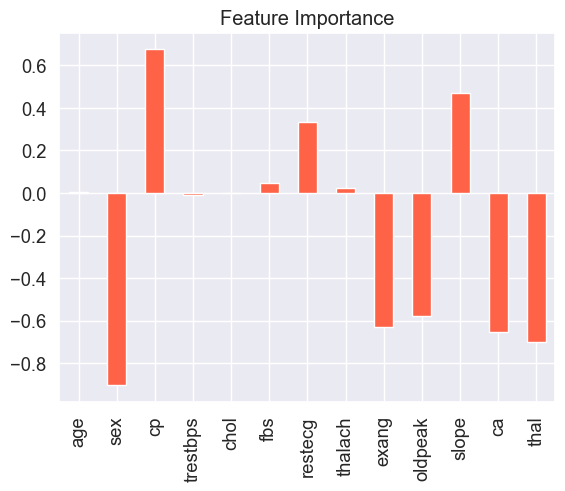

In [140]:
# Visualize feature importance
imp_features_df = pd.DataFrame(feature_dict, index=[0])
imp_features_df.T.plot(kind="bar",
                       title="Feature Importance",
                       legend=False,
                       color="tomato");